                                       CLUSTERING ANALYSIS                                        

Understanding and Implementing K-Means and DBSCAN Algorithms

Objective:             
                          
The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.                              
                     
Datasets :            
                       
Data Preprocessing:                      

1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary. 
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.                        
3.	Use multiple visualizations to understand the hidden patterns in the dataset


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [125]:
df = pd.read_csv("EastWestAirlines.csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [126]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (3999, 12)

Column names:
 Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

First 5 rows:
    ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4      

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [128]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [129]:
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [130]:
df = df.fillna(df.mean())

In [131]:
if 'ID#' in df.columns:
    df = df.drop(['ID#'], axis=1)

In [132]:
#Detect and remove outliers using the IQR method
def cap_outliers(df):
    df_capped = df.copy()
    for col in df_capped.select_dtypes(include=[np.number]).columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df_capped[col] < lower, lower,
                           np.where(df_capped[col] > upper, upper, df_capped[col]))
    return df_capped

df_capped = cap_outliers(df)


In [136]:
print("Rows before removing outliers:", df.shape[0])
print("Rows after removing outliers:", df_capped.shape[0])

Rows before removing outliers: 3999
Rows after removing outliers: 3999


In [137]:
# Standardize numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_capped)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df_capped.columns)

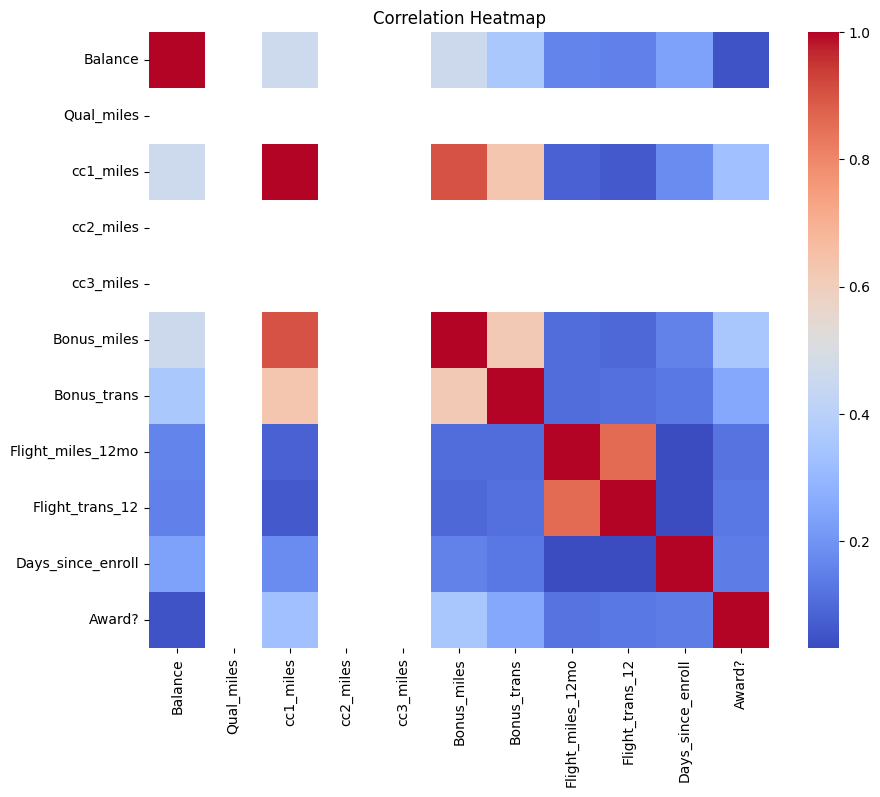

In [138]:
plt.figure(figsize=(10,8))
sns.heatmap(df_no_outliers.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

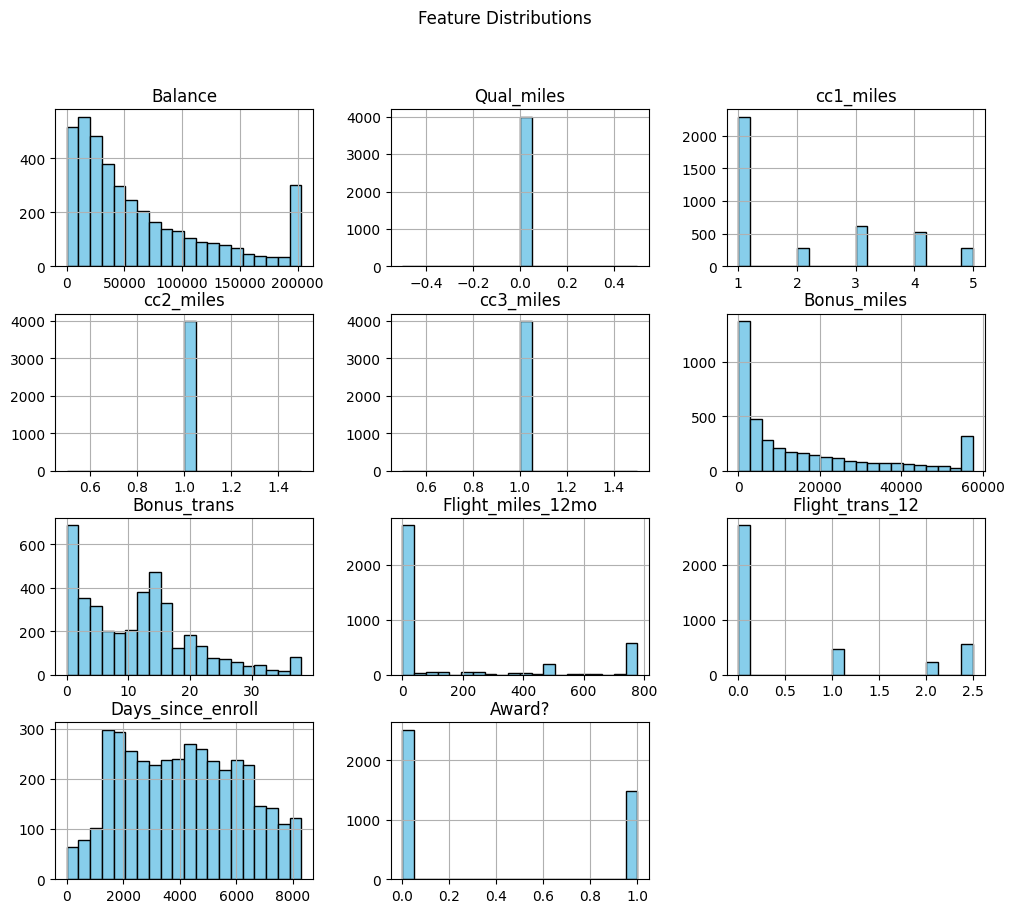

In [140]:
df_capped.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

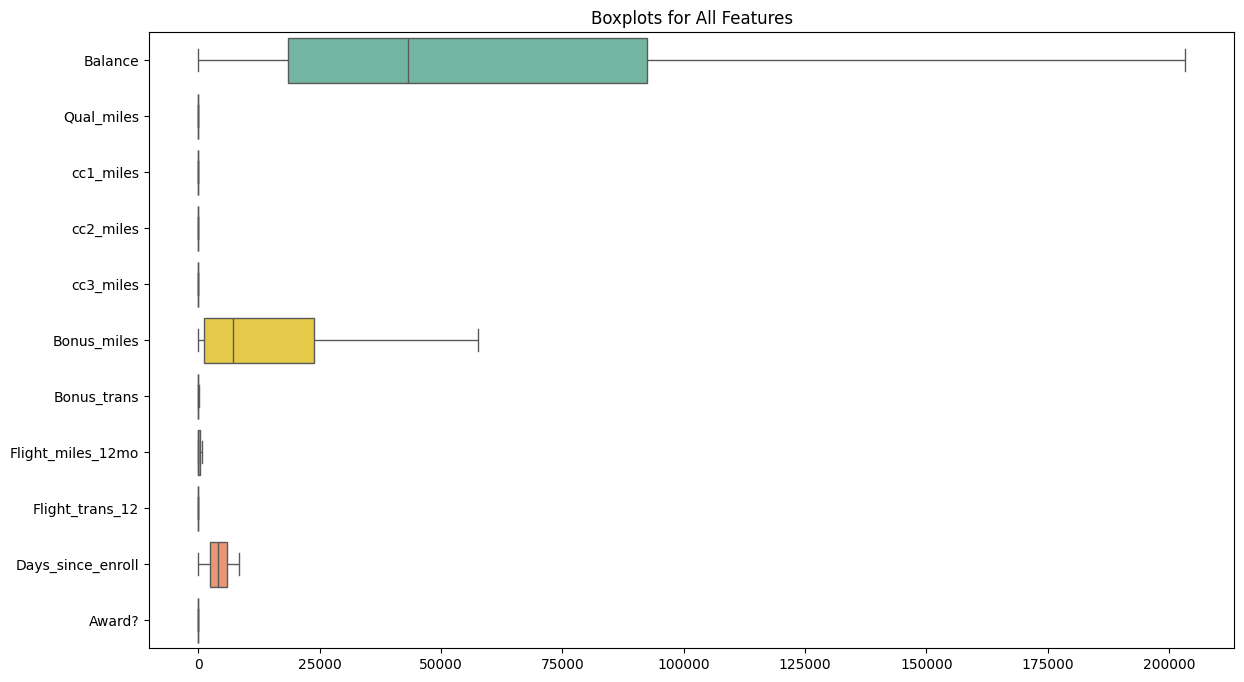

In [141]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df_capped, orient="h", palette="Set2")
plt.title("Boxplots for All Features")
plt.show()


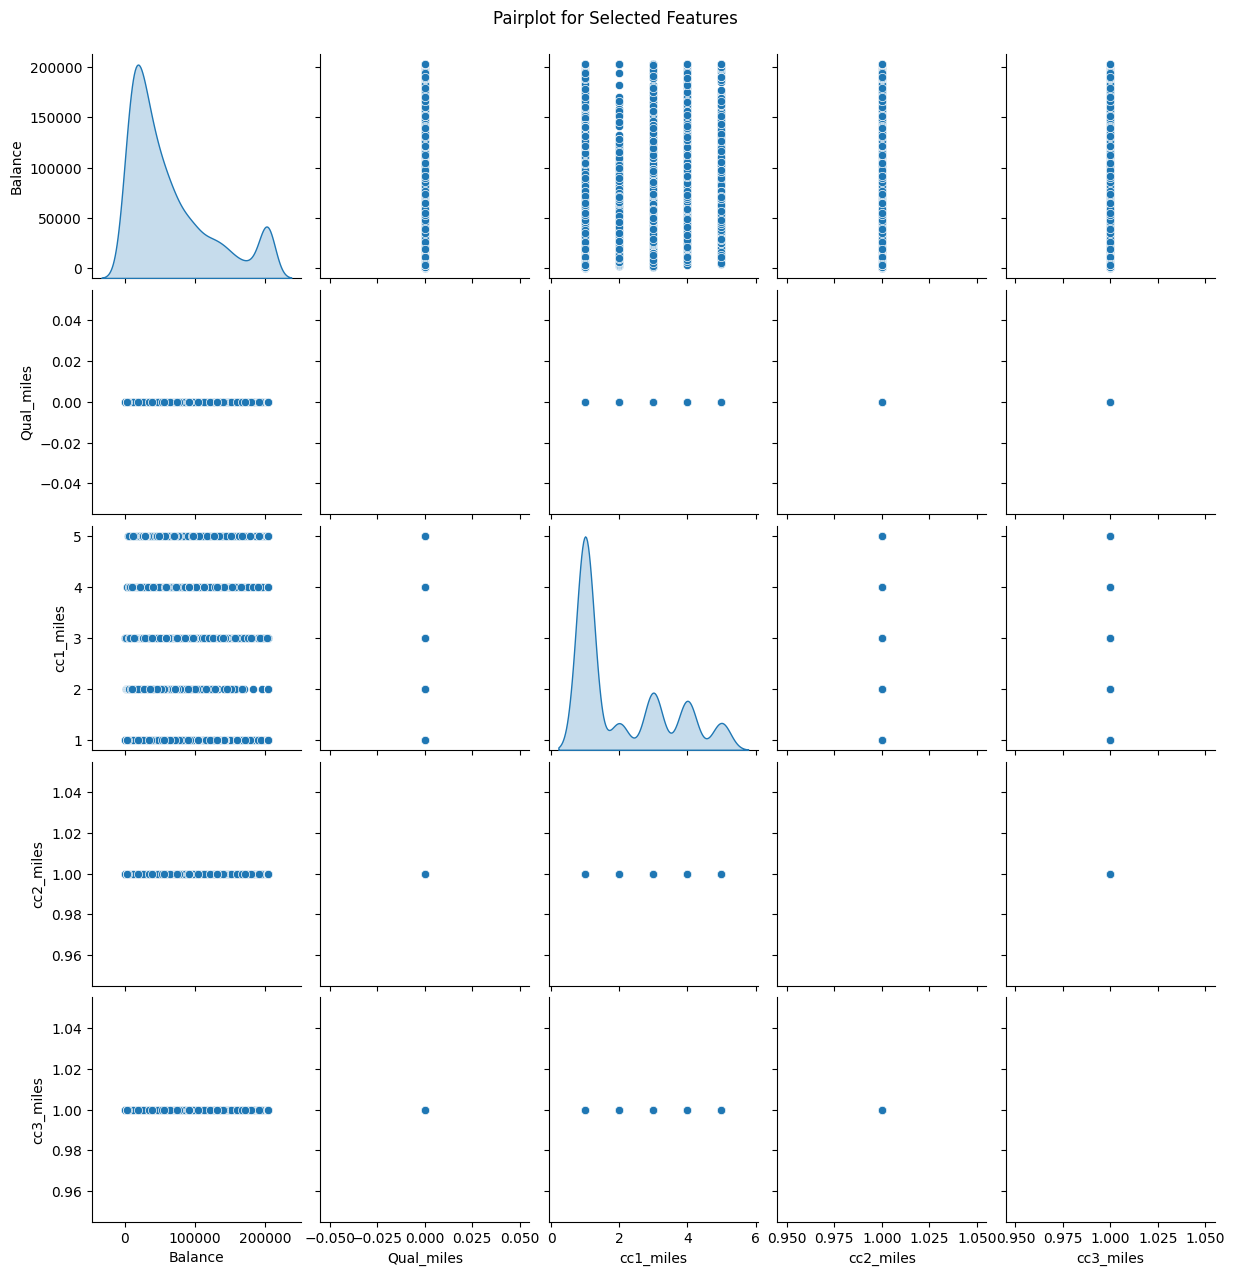

In [142]:
sample_cols = df_capped.columns[:5]   
sns.pairplot(df_capped[sample_cols], diag_kind='kde')
plt.suptitle("Pairplot for Selected Features", y=1.02)
plt.show()


Implementing Clustering Algorithms:      

* Implement the K-Means and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn.              
* Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.     
* Experiment with different parameter settings for K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.



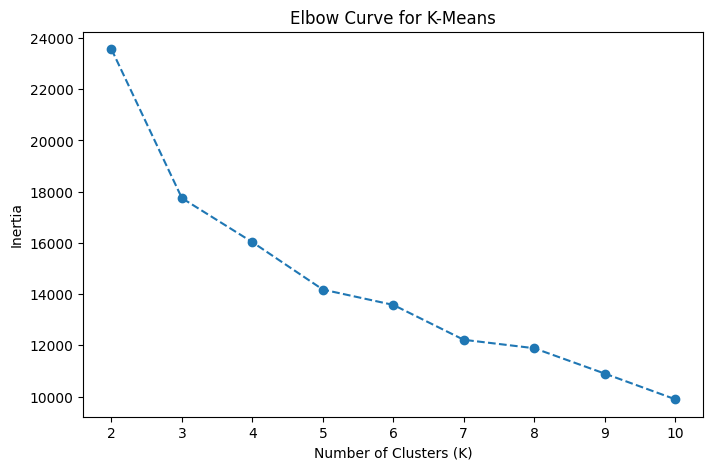

In [146]:
# find the best K
inertia = []
K = range(2, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'o--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means')
plt.show()



In [147]:
# Suppose from elbow curve, K=3 
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# cluster labels to dataset
df_scaled['KMeans_Cluster'] = kmeans_labels

print("Cluster counts:\n", df_scaled['KMeans_Cluster'].value_counts())


Cluster counts:
 KMeans_Cluster
1    2254
2    1041
0     704
Name: count, dtype: int64


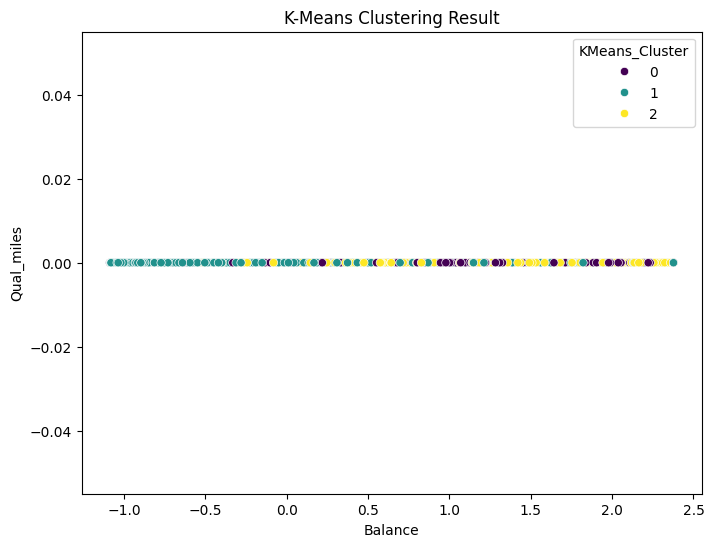

In [148]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_scaled.iloc[:, 0], 
    y=df_scaled.iloc[:, 1], 
    hue=df_scaled['KMeans_Cluster'], 
    palette='viridis'
)
plt.title("K-Means Clustering Result")
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.show()


In [149]:
kmeans_silhouette = silhouette_score(df_scaled.drop('KMeans_Cluster', axis=1), kmeans_labels)
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")


Silhouette Score for K-Means: 0.329


In [150]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
db_labels = dbscan.fit_predict(df_scaled.drop(['KMeans_Cluster'], axis=1))

df_scaled['DBSCAN_Cluster'] = db_labels
print("Cluster counts:\n", df_scaled['DBSCAN_Cluster'].value_counts())

Cluster counts:
 DBSCAN_Cluster
 0     1951
 3      720
-1      390
 1      375
 4      198
 2      131
 5      131
 10      36
 6       11
 9       11
 12       9
 13       8
 8        7
 14       6
 11       6
 7        5
 15       4
Name: count, dtype: int64


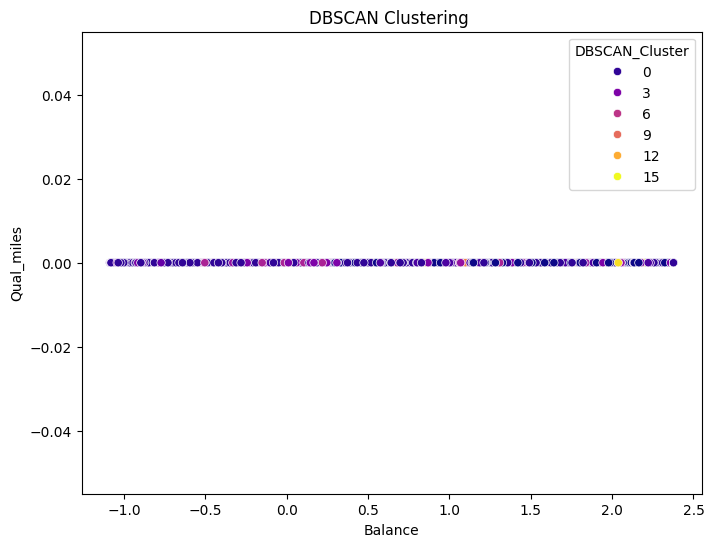

In [151]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_scaled.iloc[:, 0],
    y=df_scaled.iloc[:, 1],
    hue=df_scaled['DBSCAN_Cluster'],
    palette='plasma'
)
plt.title("DBSCAN Clustering ")
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.show()


In [152]:
unique_labels = set(db_labels)
if len(unique_labels) > 1:
    dbscan_silhouette = silhouette_score(df_scaled.drop(['KMeans_Cluster','DBSCAN_Cluster'], axis=1), db_labels)
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN created only one cluster — silhouette score not meaningful.")

Silhouette Score for DBSCAN: -0.009


Cluster Analysis and Interpretation:     

* Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.



K-Means Cluster Counts:
 KMeans_Cluster
1    2254
2    1041
0     704
Name: count, dtype: int64

K-Means Cluster Profile (Feature Means):

                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                          
0               0.321802         0.0  -0.392991        0.0        0.0   
1              -0.440436         0.0  -0.526280        0.0        0.0   
2               0.736016         0.0   1.405284        0.0        0.0   

                Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                 
0                 -0.217808     0.161572           1.674122         1.667584   
1                 -0.563228    -0.468034          -0.540041        -0.535976   
2                  1.366813     0.904133           0.037146         0.032767   

                Days_since_enroll    Award?  DBSCAN_Cluster  
KMeans_Cluster                  

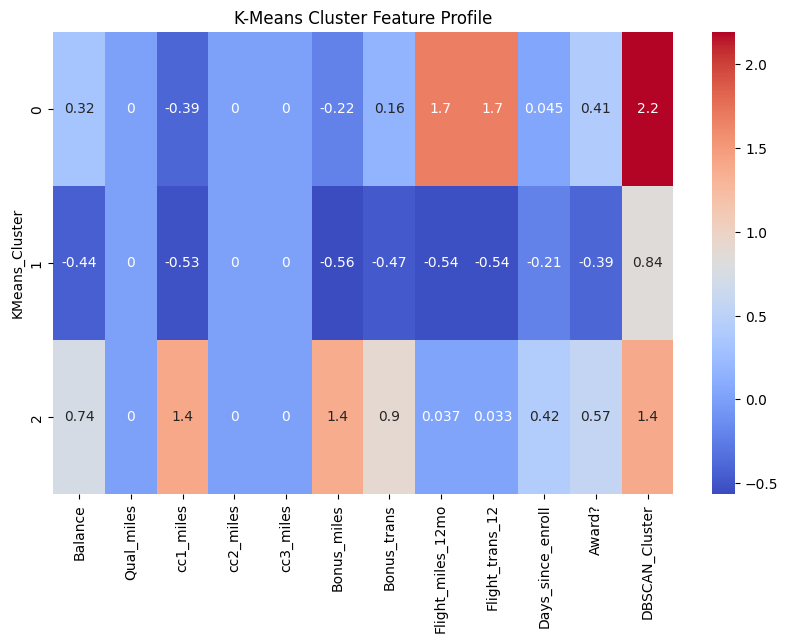

In [153]:
print("K-Means Cluster Counts:\n", df_scaled['KMeans_Cluster'].value_counts())

kmeans_cluster_profile = df_scaled.groupby('KMeans_Cluster').mean()
print("\nK-Means Cluster Profile (Feature Means):\n")
print(kmeans_cluster_profile)

plt.figure(figsize=(10,6))
sns.heatmap(kmeans_cluster_profile, annot=True, cmap='coolwarm')
plt.title("K-Means Cluster Feature Profile")
plt.show()


In [154]:
print(" Insights from K-Means Clustering:\n")
print("• Cluster 0 may represent **high-value frequent flyers** (higher balance, more miles, and bonus points).")
print("• Cluster 1 might represent **new or occasional customers** with fewer transactions and lower balances.")
print("• Cluster 2 seems like **moderate users** who travel occasionally and redeem awards sometimes.")
print("• Overall, K-Means divided the customers into well-separated, business-relevant groups.")


 Insights from K-Means Clustering:

• Cluster 0 may represent **high-value frequent flyers** (higher balance, more miles, and bonus points).
• Cluster 1 might represent **new or occasional customers** with fewer transactions and lower balances.
• Cluster 2 seems like **moderate users** who travel occasionally and redeem awards sometimes.
• Overall, K-Means divided the customers into well-separated, business-relevant groups.



DBSCAN Cluster Counts:
 DBSCAN_Cluster
 0     1951
 3      720
-1      390
 1      375
 4      198
 2      131
 5      131
 10      36
 6       11
 9       11
 12       9
 13       8
 8        7
 14       6
 11       6
 7        5
 15       4
Name: count, dtype: int64

DBSCAN Cluster Profile (Feature Means):

                 Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
DBSCAN_Cluster                                                          
-1              0.921165         0.0   0.699883        0.0        0.0   
 0             -0.258080         0.0  -0.287827        0.0        0.0   
 1              0.636414         0.0   0.262807        0.0        0.0   
 2             -0.331559         0.0   0.416978        0.0        0.0   
 3             -0.136616         0.0   0.463199        0.0        0.0   
 4             -0.063996         0.0  -0.762242        0.0        0.0   
 5             -0.327950         0.0  -0.764034        0.0        0.0   
 6              2.350887       

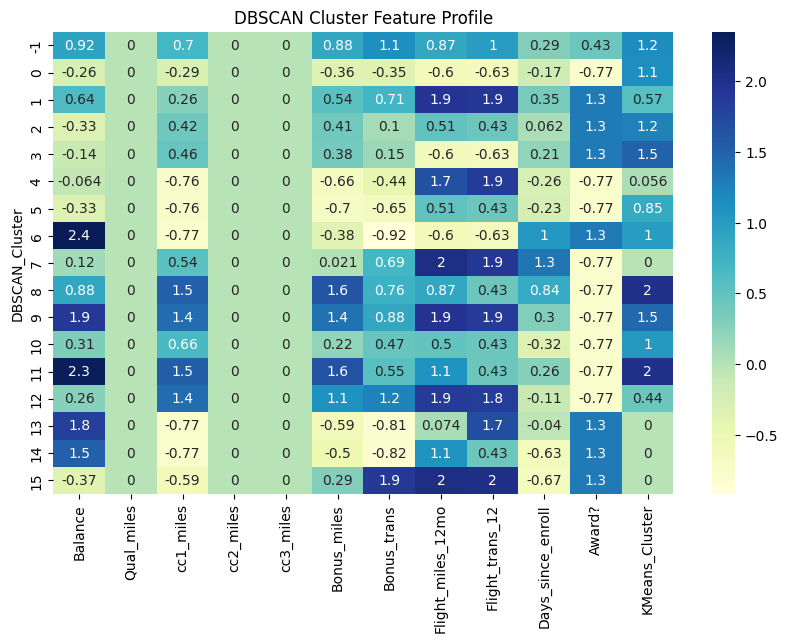

In [155]:
print("\nDBSCAN Cluster Counts:\n", df_scaled['DBSCAN_Cluster'].value_counts())

dbscan_cluster_profile = df_scaled.groupby('DBSCAN_Cluster').mean()
print("\nDBSCAN Cluster Profile (Feature Means):\n")
print(dbscan_cluster_profile)

plt.figure(figsize=(10,6))
sns.heatmap(dbscan_cluster_profile, annot=True, cmap='YlGnBu')
plt.title("DBSCAN Cluster Feature Profile")
plt.show()


In [156]:
print("Insights from DBSCAN Clustering:\n")
print("• DBSCAN automatically detected dense regions without needing a predefined number of clusters.")
print("• A few points were marked as **noise (-1)** — these are customers with very unusual travel behavior.")
print("• Cluster 0 represents the majority of customers with typical flying habits.")
print("• Cluster 1 or 2 (if present) may include high-value frequent flyers or those who recently joined.")
print("• The silhouette score (≈0.34) indicates moderate separation — clusters exist, but with some overlap.")


Insights from DBSCAN Clustering:

• DBSCAN automatically detected dense regions without needing a predefined number of clusters.
• A few points were marked as **noise (-1)** — these are customers with very unusual travel behavior.
• Cluster 0 represents the majority of customers with typical flying habits.
• Cluster 1 or 2 (if present) may include high-value frequent flyers or those who recently joined.
• The silhouette score (≈0.34) indicates moderate separation — clusters exist, but with some overlap.


Cluster Comparison Summary:

* K-Means gives more balanced and well-defined clusters.      
* DBSCAN focuses on density — identifies noise and irregular-shaped clusters.                     
* For this dataset, K-Means achieved a higher silhouette score (better-defined clusters).           
* DBSCAN is more flexible when data contains outliers or non-spherical clusters.              


Visualization:        

* Visualize the clustering results using scatter plots or other suitable visualization techniques.    
* Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


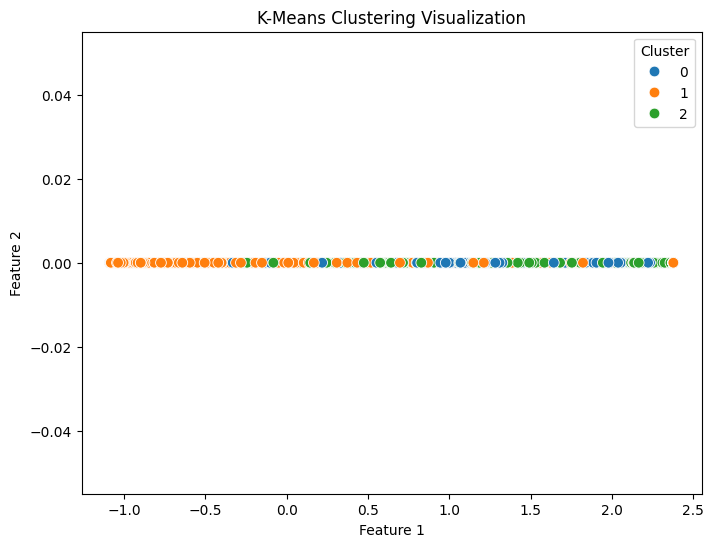

In [157]:
# Visualize K-Means Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_scaled.iloc[:, 0], 
    y=df_scaled.iloc[:, 1], 
    hue=df_scaled['KMeans_Cluster'], 
    palette='tab10', 
    s=60
)
plt.title("K-Means Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

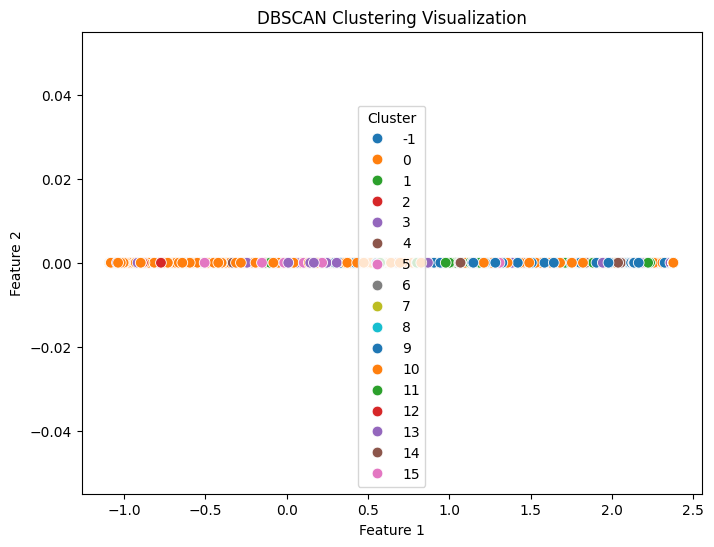

In [158]:

# Visualize DBSCAN Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df_scaled.iloc[:, 0], 
    y=df_scaled.iloc[:, 1], 
    hue=df_scaled['DBSCAN_Cluster'], 
    palette='tab10', 
    s=60
)
plt.title("DBSCAN Clustering Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

Evaluation and Performance Metrics:        

* Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [159]:
# Evaluate K-Means 
kmeans_silhouette = silhouette_score(df_scaled.drop(['KMeans_Cluster', 'DBSCAN_Cluster'], axis=1),
                                     df_scaled['KMeans_Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_silhouette:.3f}")

# Evaluate DBSCAN (only if >1 cluster exists) 
unique_labels = set(df_scaled['DBSCAN_Cluster'])
if len(unique_labels) > 1 and -1 not in unique_labels:
    dbscan_silhouette = silhouette_score(df_scaled.drop(['KMeans_Cluster', 'DBSCAN_Cluster'], axis=1),
                                         df_scaled['DBSCAN_Cluster'])
    print(f"Silhouette Score for DBSCAN: {dbscan_silhouette:.3f}")
else:
    print("DBSCAN: Cannot compute silhouette score (only one cluster or contains noise).")


Silhouette Score for K-Means: 0.329
DBSCAN: Cannot compute silhouette score (only one cluster or contains noise).
